In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from functions import all_models as m
from functions import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
%matplotlib inline

In [2]:
df=pd.read_csv('Cleaned Data.csv', index_col=0)
df.head()

,Subject Age Group,Subject ID,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Officer Age Group,Day of Week,Year,Month
0,26 - 35,0,Field Contact,None,1,White,Asian,Male,2015-04-17,UNKNOWN,0,0,Unknown,-,-,Gen X,Friday,2015,April
1218,1 - 17,0,Field Contact,None,1,White,White,Female,2015-05-31,UNKNOWN,0,0,Unknown,-,-,Millenial,Sunday,2015,May
1598,1 - 17,0,Arrest,None,1,White,American Indian or Alaska Native,Male,2015-09-13,UNKNOWN,0,1,East,G,G1,Millenial,Sunday,2015,September
1599,1 - 17,0,Field Contact,None,0,Not Specified,Unknown,Male,2015-04-19,UNKNOWN,0,1,Unknown,-,-,Millenial,Sunday,2015,April
1602,1 - 17,0,Field Contact,None,1,White,White,Male,2015-04-20,UNKNOWN,0,0,Unknown,-,-,Millenial,Monday,2015,April


In [3]:
y = df['Stop Resolution']
x=df.drop(columns=['Arrest Flag', 'Reported Date', 'Stop Resolution'])

In [4]:
x = pd.get_dummies(x, drop_first=True, columns=['Subject Age Group', 'Weapon Type', 'Officer Race', 
                                            'Subject Perceived Race', 'Subject Perceived Gender', 'Call Type', 
                                            'Precinct', 'Sector', 'Beat', 'Officer Age Group', 'Day of Week', 'Year', 'Month'])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=16)

Logistic Regression Results:


C:\Users\ferra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


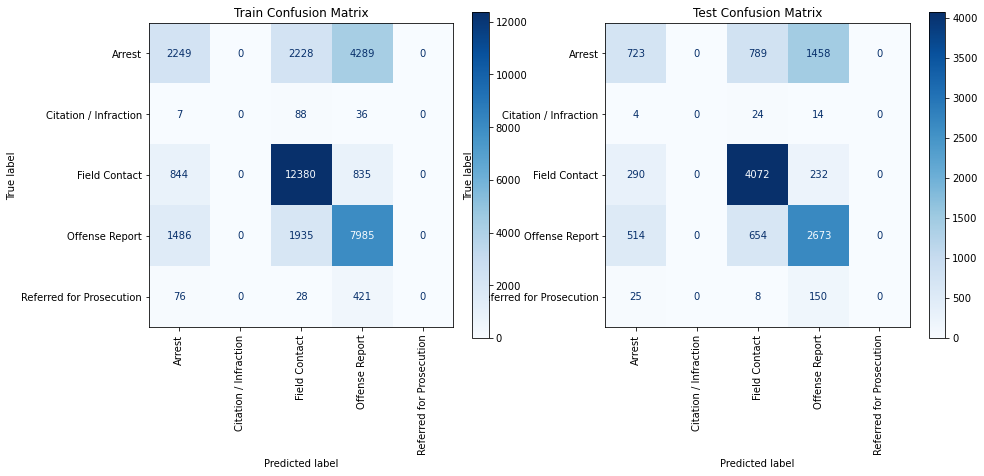

C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Arrest       0.46      0.24      0.32      2970
   Citation / Infraction       0.00      0.00      0.00        42
           Field Contact       0.73      0.89      0.80      4594
          Offense Report       0.59      0.70      0.64      3841
Referred for Prosecution       0.00      0.00      0.00       183

                accuracy                           0.64     11630
               macro avg       0.36      0.37      0.35     11630
            weighted avg       0.60      0.64      0.61     11630



K-Nearest Neighbors Results:


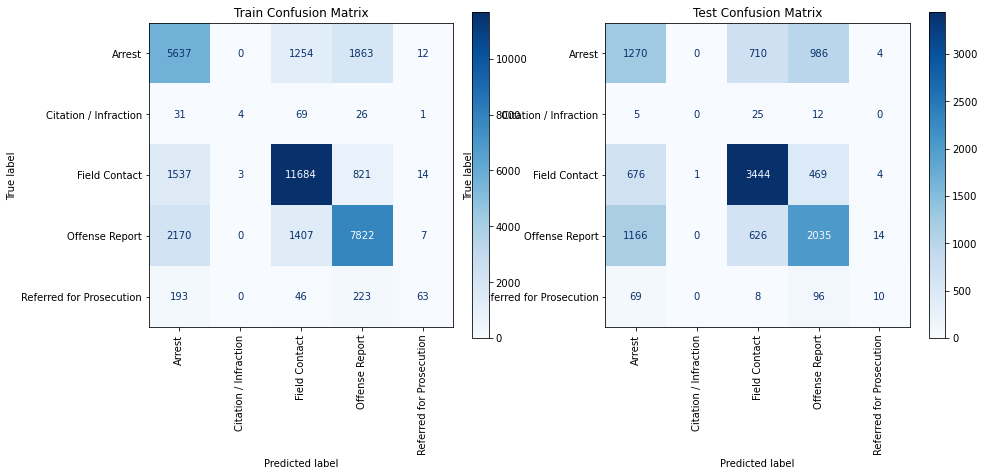

                          precision    recall  f1-score   support

                  Arrest       0.40      0.43      0.41      2970
   Citation / Infraction       0.00      0.00      0.00        42
           Field Contact       0.72      0.75      0.73      4594
          Offense Report       0.57      0.53      0.55      3841
Referred for Prosecution       0.31      0.05      0.09       183

                accuracy                           0.58     11630
               macro avg       0.40      0.35      0.36     11630
            weighted avg       0.58      0.58      0.58     11630



Naive Bayes Results:


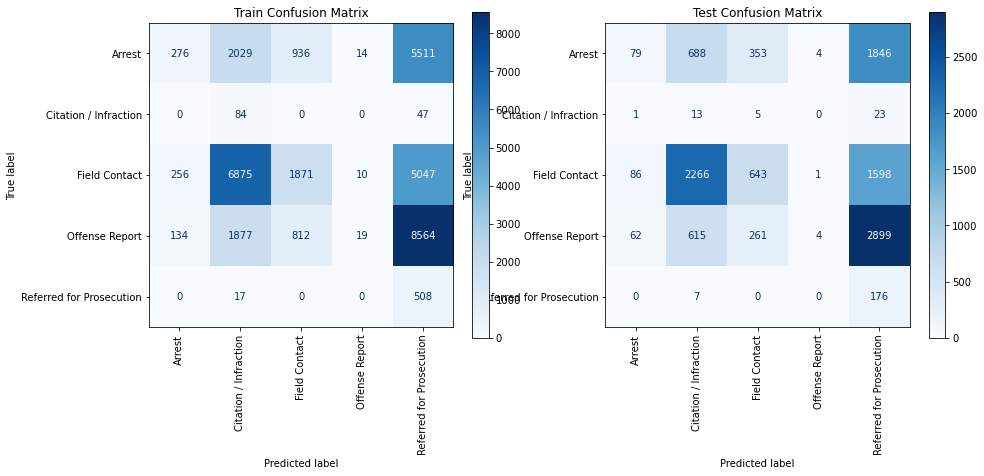

                          precision    recall  f1-score   support

                  Arrest       0.35      0.03      0.05      2970
   Citation / Infraction       0.00      0.31      0.01        42
           Field Contact       0.51      0.14      0.22      4594
          Offense Report       0.44      0.00      0.00      3841
Referred for Prosecution       0.03      0.96      0.05       183

                accuracy                           0.08     11630
               macro avg       0.27      0.29      0.07     11630
            weighted avg       0.44      0.08      0.10     11630



Decision Tree Results:


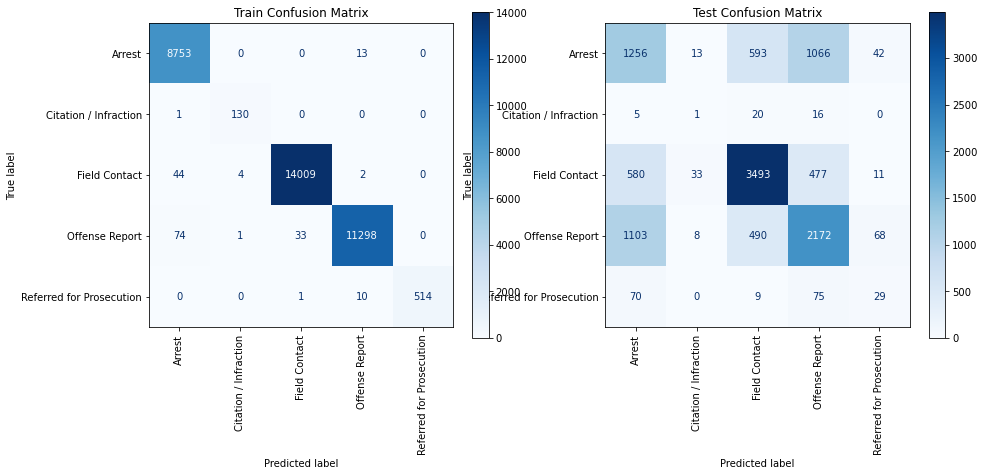

                          precision    recall  f1-score   support

                  Arrest       0.42      0.42      0.42      2970
   Citation / Infraction       0.02      0.02      0.02        42
           Field Contact       0.76      0.76      0.76      4594
          Offense Report       0.57      0.57      0.57      3841
Referred for Prosecution       0.19      0.16      0.17       183

                accuracy                           0.60     11630
               macro avg       0.39      0.39      0.39     11630
            weighted avg       0.60      0.60      0.60     11630



Random Forest Results:


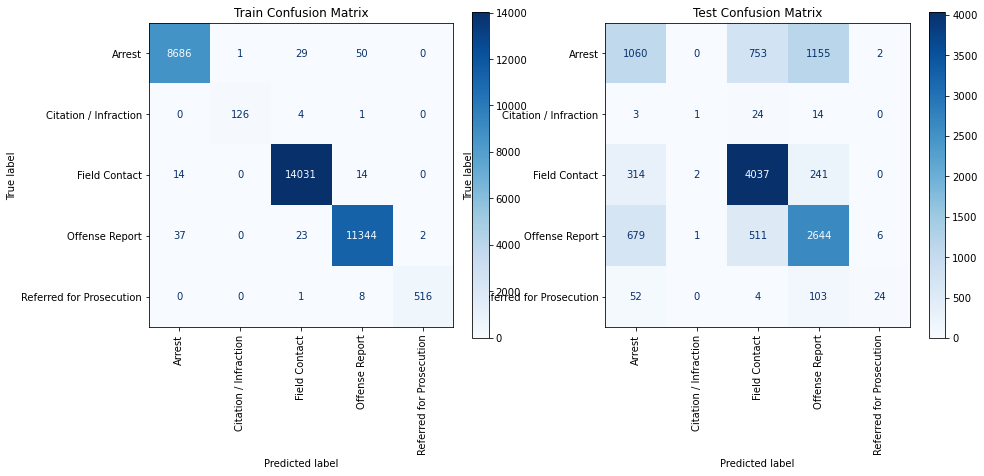

                          precision    recall  f1-score   support

                  Arrest       0.50      0.36      0.42      2970
   Citation / Infraction       0.25      0.02      0.04        42
           Field Contact       0.76      0.88      0.81      4594
          Offense Report       0.64      0.69      0.66      3841
Referred for Prosecution       0.75      0.13      0.22       183

                accuracy                           0.67     11630
               macro avg       0.58      0.42      0.43     11630
            weighted avg       0.65      0.67      0.65     11630



XGBoost Results:


C:\Users\ferra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:18:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


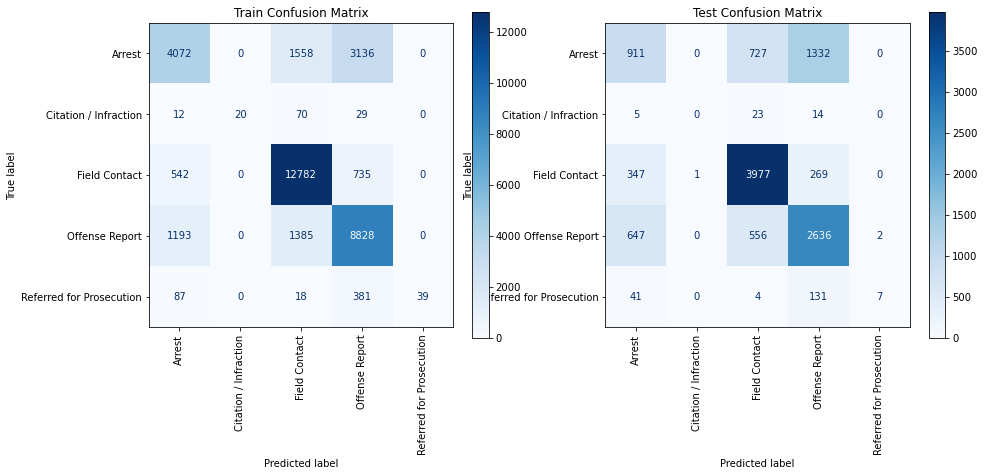

                          precision    recall  f1-score   support

                  Arrest       0.47      0.31      0.37      2970
   Citation / Infraction       0.00      0.00      0.00        42
           Field Contact       0.75      0.87      0.80      4594
          Offense Report       0.60      0.69      0.64      3841
Referred for Prosecution       0.78      0.04      0.07       183

                accuracy                           0.65     11630
               macro avg       0.52      0.38      0.38     11630
            weighted avg       0.63      0.65      0.63     11630



Support Vector Machine Results:


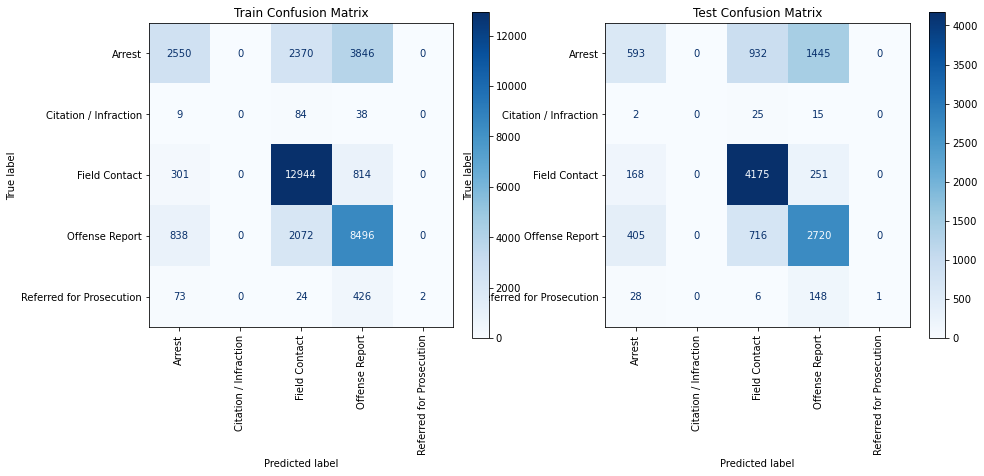

C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Arrest       0.50      0.20      0.28      2970
   Citation / Infraction       0.00      0.00      0.00        42
           Field Contact       0.71      0.91      0.80      4594
          Offense Report       0.59      0.71      0.65      3841
Referred for Prosecution       1.00      0.01      0.01       183

                accuracy                           0.64     11630
               macro avg       0.56      0.36      0.35     11630
            weighted avg       0.62      0.64      0.60     11630





,Precision Score,Recall Score,Accuracy Score,F1 Score
Logistic Regression,64.21%,64.21%,64.21%,64.21%
K-Nearest Neighbors,58.12%,58.12%,58.12%,58.12%
Naive Bayes,7.87%,7.87%,7.87%,7.87%
Decision Tree,59.77%,59.77%,59.77%,59.77%
Random Forest,66.78%,66.78%,66.78%,66.78%
XGBoost,64.75%,64.75%,64.75%,64.75%
Support Vector Machine,64.39%,64.39%,64.39%,64.39%


The model with the highest precision score is Random Forest.
The model with the highest recall score is Random Forest.
The model with the highest accuracy score is Random Forest.
The model with the highest F1 score is Random Forest.


In [6]:
models = m(x_train, x_test, y_train, y_test)

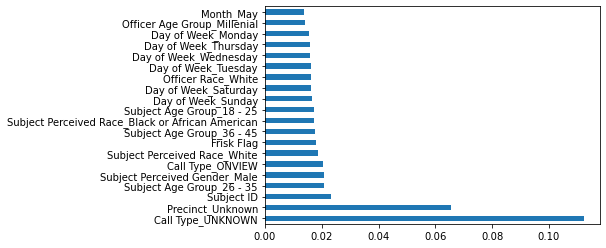

In [7]:
f_import = pd.Series(models[4].feature_importances_, index=x.columns)
f_import.nlargest(20).plot(kind='barh');

## Iteration 1 - SMOTE

In [11]:
oversample = SMOTE()

x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)

In [12]:
model_1 = RandomForestClassifier()
model_1.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

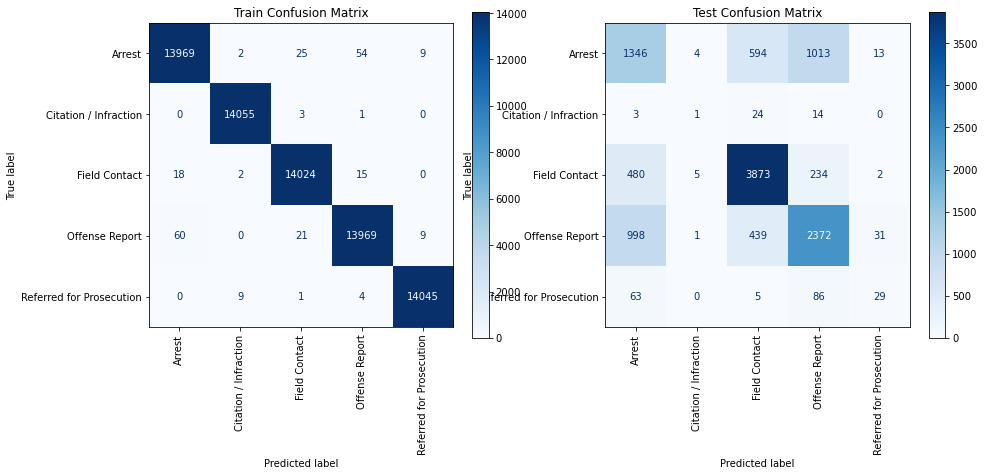

                          precision    recall  f1-score   support

                  Arrest       0.47      0.45      0.46      2970
   Citation / Infraction       0.09      0.02      0.04        42
           Field Contact       0.78      0.84      0.81      4594
          Offense Report       0.64      0.62      0.63      3841
Referred for Prosecution       0.39      0.16      0.22       183

                accuracy                           0.66     11630
               macro avg       0.47      0.42      0.43     11630
            weighted avg       0.65      0.66      0.65     11630





In [13]:
metrics(model_1, x_train_smote, y_train_smote, x_test, y_test)

## Iteration 2 -- Grid Search

In [14]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [30, 60, 100],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [15]:
grid_search_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_model.fit(x_train, y_train)

NameError: name 'rf_grid_search' is not defined

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 60}


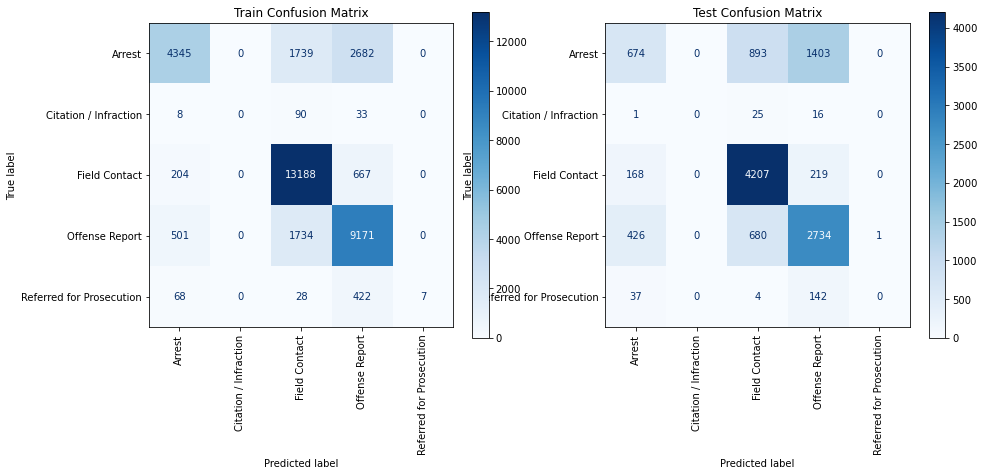

C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                  Arrest       0.52      0.23      0.32      2970
   Citation / Infraction       0.00      0.00      0.00        42
           Field Contact       0.72      0.92      0.81      4594
          Offense Report       0.61      0.71      0.65      3841
Referred for Prosecution       0.00      0.00      0.00       183

                accuracy                           0.65     11630
               macro avg       0.37      0.37      0.36     11630
            weighted avg       0.62      0.65      0.62     11630





C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ferra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(f"Optimal Parameters: {grid_search_model.best_params_}")

metrics(grid_search_model, x_train, y_train, x_test, y_test)

In [22]:
prediction = grid_search_model.predict(x_test)
print(f"The model's precision score is {precision_score(y_test, prediction, average='micro'):.2%}.")
print(f"The model's recall score is {recall_score(y_test, prediction, average='micro'):.2%}.")
print(f"The model's accuracy score is {accuracy_score(y_test, prediction):.2%}.")
print(f"The model's F1 score is {f1_score(y_test, prediction, average='micro'):.2%}.")

The model's precision score is 65.48%.
The model's recall score is 65.48%.
The model's accuracy score is 65.48%.
The model's F1 score is 65.48%.


## Iteration 3 -- Grid Search + SMOTE

In [23]:
grid_search_smote_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_smote_model.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'min_samples_leaf': [3, 6],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 100]})

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


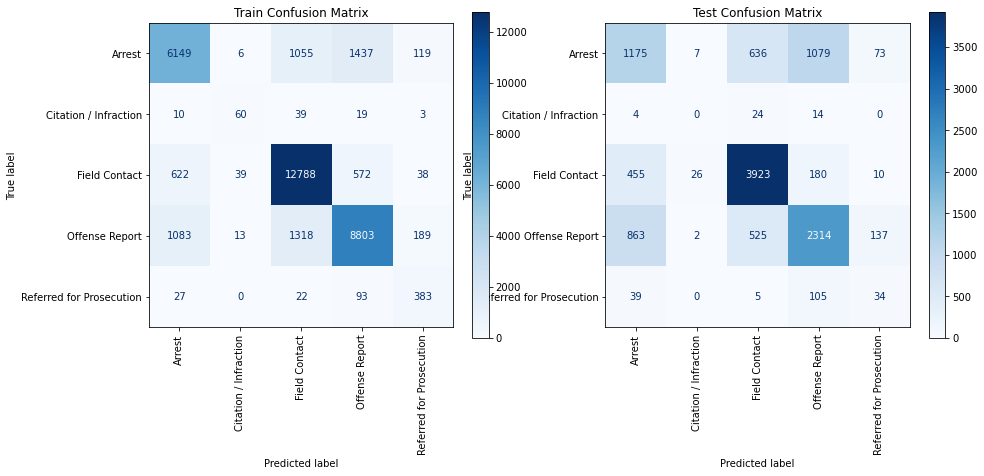

                          precision    recall  f1-score   support

                  Arrest       0.46      0.40      0.43      2970
   Citation / Infraction       0.00      0.00      0.00        42
           Field Contact       0.77      0.85      0.81      4594
          Offense Report       0.63      0.60      0.61      3841
Referred for Prosecution       0.13      0.19      0.16       183

                accuracy                           0.64     11630
               macro avg       0.40      0.41      0.40     11630
            weighted avg       0.63      0.64      0.63     11630



The model's precision score is 64.02%.
The model's recall score is 64.02%.
The model's accuracy score is 64.02%.
The model's F1 score is 64.02%.


In [25]:
print(f"Optimal Parameters: {grid_search_smote_model.best_params_}")

metrics(grid_search_smote_model, x_train, y_train, x_test, y_test)

prediction = grid_search_smote_model.predict(x_test)
print(f"The model's precision score is {precision_score(y_test, prediction, average='micro'):.2%}.")
print(f"The model's recall score is {recall_score(y_test, prediction, average='micro'):.2%}.")
print(f"The model's accuracy score is {accuracy_score(y_test, prediction):.2%}.")
print(f"The model's F1 score is {f1_score(y_test, prediction, average='micro'):.2%}.")

## Feature Importances

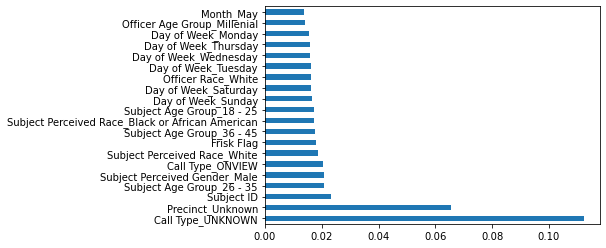

In [26]:
f_import_1 = pd.Series(models[4].feature_importances_, index=x.columns)
f_import_1.nlargest(20).plot(kind='barh');

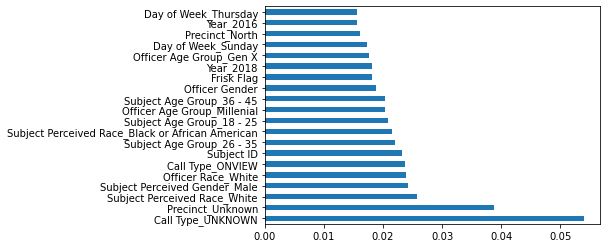

In [28]:
f_import_2 = pd.Series(model_1.feature_importances_, index=x.columns)
f_import_2.nlargest(20).plot(kind='barh');

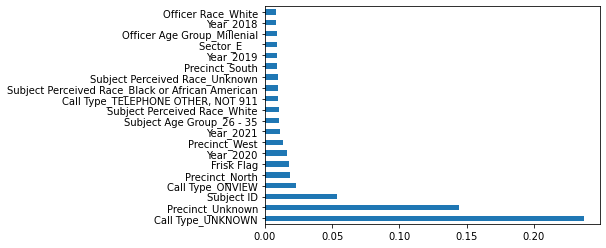

In [30]:
f_import_3 = pd.Series(grid_search_model.best_estimator_.feature_importances_, index=x.columns)
f_import_3.nlargest(20).plot(kind='barh');

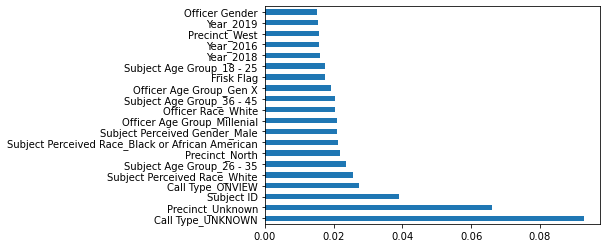

In [31]:
f_import_4 = pd.Series(grid_search_smote_model.best_estimator_.feature_importances_, index=x.columns)
f_import_4.nlargest(20).plot(kind='barh');